<a href="https://colab.research.google.com/github/Dadoyen2/Artificial-Neural-network-for-the-Analysis-of-Portuguese-wines-Project/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# insert your code here
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os,sys
from IPython.display import display
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
import shap

fatal: destination path 'pyPhysChem' already exists and is not an empty directory.



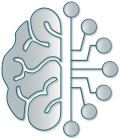

**Start at:** Saturday 21 December 2024, 17:52:28  
**Hostname:** e26a7228ced9 (Linux)

<p style="text-align: center"><img width="800px" src="/content/pyPhysChem/configsvg/pyPhysChemBanner.svg" style="margin-left:auto; margin-right:auto"/></p>

Modules imported and initialized successfully!


In [35]:
!git clone https://github.com/rpoteau/pyPhysChem.git
import sys
sys.path.append('/content/pyPhysChem/config')
# Import the required modules
import visualID_Eng as vID
from visualID_Eng import color, fg, hl, bg
import tools4pyPhysChem as t4pPC

# Initialize visualID_Eng
vID.init('/content/pyPhysChem/config')

print("Modules imported and initialized successfully!")

In [77]:


# Paths to the files
file_path_red = '/content/winequality-red.csv'
file_path_white = '/content/winequality-white.csv'

# Load the data using pandas
data_red = pd.read_csv(file_path_red, sep=";", header=0)
data_white = pd.read_csv(file_path_white, sep=";", header=0)

# Change the last column of white wine data to 1
data_white.iloc[:, -1] = 1  # Update the last column (for white wine)

# Change the last column of red wine data to 0
data_red.iloc[:, -1] = 0  # Update the last column (for red wine)

# Add a column to indicate wine type (1 for white, 0 for red)
data_red['wine_type'] = 0  # Red wine type is 0
data_white['wine_type'] = 1  # White wine type is 1

# Combine the two DataFrames (concatenate them)
data_combined = pd.concat([data_red, data_white], ignore_index=True)

# Shuffle the combined DataFrame to mix red and white wines randomly
data_combined = data_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Print column names before removing 'quality' to check for any issues
#print("Column names before removing 'quality':", data_combined.columns)

# Remove the 'quality' column
data_combined.drop(columns=['quality'], inplace=True)


# Change the last column name to 'red_wine'
#data_combined.rename(columns={data_combined.columns[-1]: 'red_wine'}, inplace=True)

# Display the first 100 rows
# Display the first 100 rows of the combined data
display(data_combined.head(100))


# Display descriptive statistics with 2 decimal places
display(data_combined.describe().style.format("{0:.2f}"))

features = data_combined.columns[:-1]
Target=    data_combined.columns[-1]

#from google.colab import files

# Save the DataFrame as a CSV file in the Colab environment
#output_file = '/content/data_combined.csv'
#data_combined.to_csv(output_file, index=False)
# Download the CSV file to your local machine
#files.download(output_file)





,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,1
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,1
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,1
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.5,0.24,0.49,9.4,0.048,50.0,149.0,0.99620,3.17,0.59,10.5,1
96,5.0,0.74,0.00,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,0
97,7.4,0.28,0.30,5.3,0.054,44.0,161.0,0.99410,3.12,0.48,10.3,1
98,6.6,0.56,0.16,3.1,0.045,28.0,92.0,0.99400,3.12,0.35,9.1,1


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,0.75
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.43
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,0.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,1.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,1.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,1.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,1.00


In [47]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from google.colab import files

# Extract features and target variable
x = data_combined.iloc[:, :-1].values  # Extract all columns except the last (features)
y = data_combined.iloc[:, -1].values   # Extract the last column (target)

# Display original feature values (first 5 rows)
print("Original Feature Values (First 5 Rows):")
display(pd.DataFrame(x, columns=features).head())

# Standardize the feature values
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)  # Standardize only feature values

# Convert standardized values to a DataFrame (excluding the target)
standardized_features = pd.DataFrame(x_standardized, columns=features)  # Columns from features

# Display standardized features (first 5 rows)
print("Standardized Features (Excluding Target, First 5 Rows):")
display(standardized_features.head())

# Save the standardized features (without target) to a CSV file
output_file = '/content/standardized_features.csv'
standardized_features.to_csv(output_file, index=False)

# Download the file to your local machine
files.download(output_file)


Original Feature Values (First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9


Standardized Features (Excluding Target, First 5 Rows):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610
3,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615
4,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.166089,-1.030629,2.899845,1.546371,-0.314975,-0.367664,0.181456,-0.165631,0.258120,-1.016626,1.432308
1,0.373895,1.824366,-0.747613,-0.681719,0.598504,0.083090,0.305311,0.301278,0.320319,-0.546178,-0.496219
2,-0.320370,0.305752,0.147046,0.411306,-1.028631,0.421155,0.305311,-0.859324,-0.239471,-0.613385,1.264610
3,-0.706073,-0.362438,1.041706,1.210056,-0.457706,1.717074,1.189993,0.408001,-0.612663,-0.142937,-0.831615
4,0.142473,0.062773,-0.816433,1.777588,-0.058059,1.829762,2.003900,1.395180,-0.674862,-0.210144,-1.334709


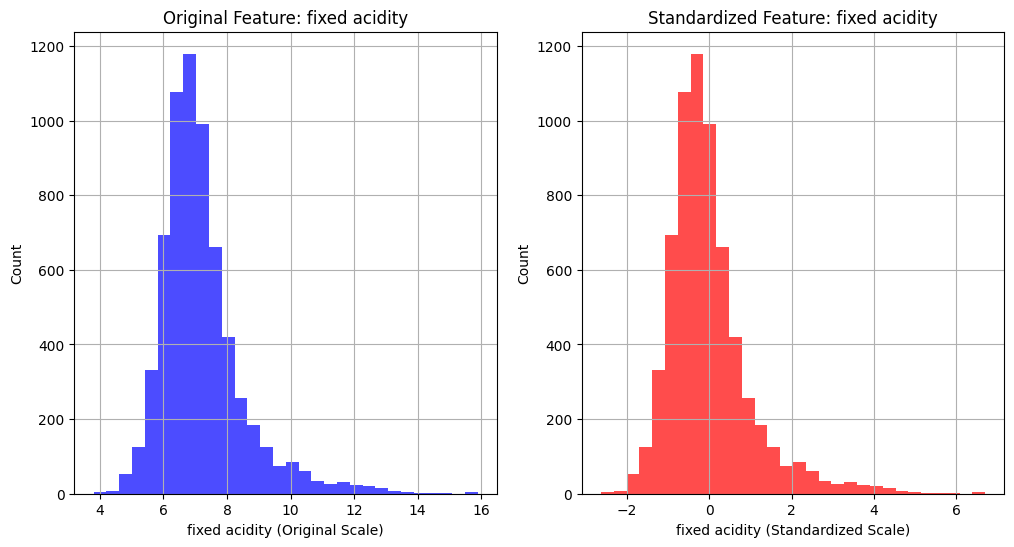

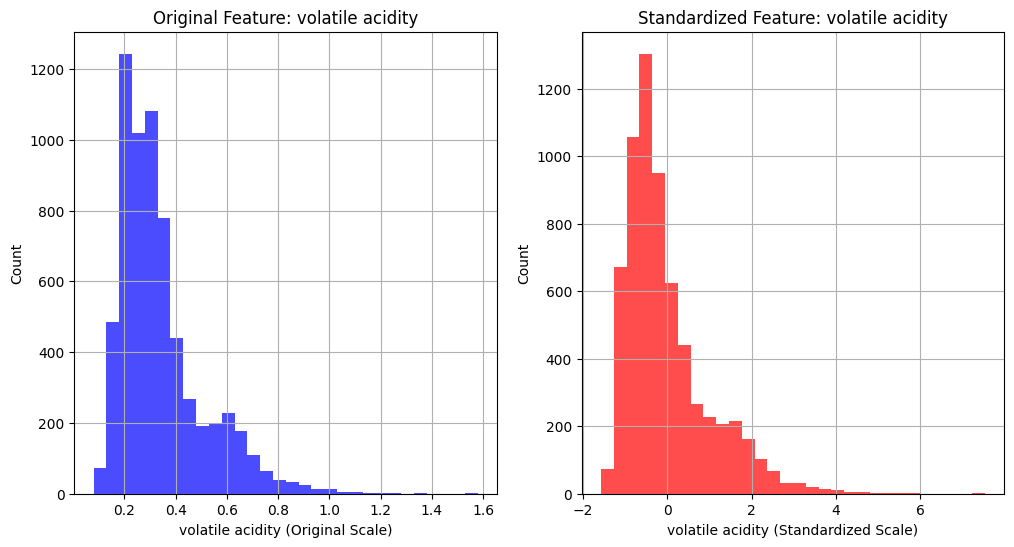

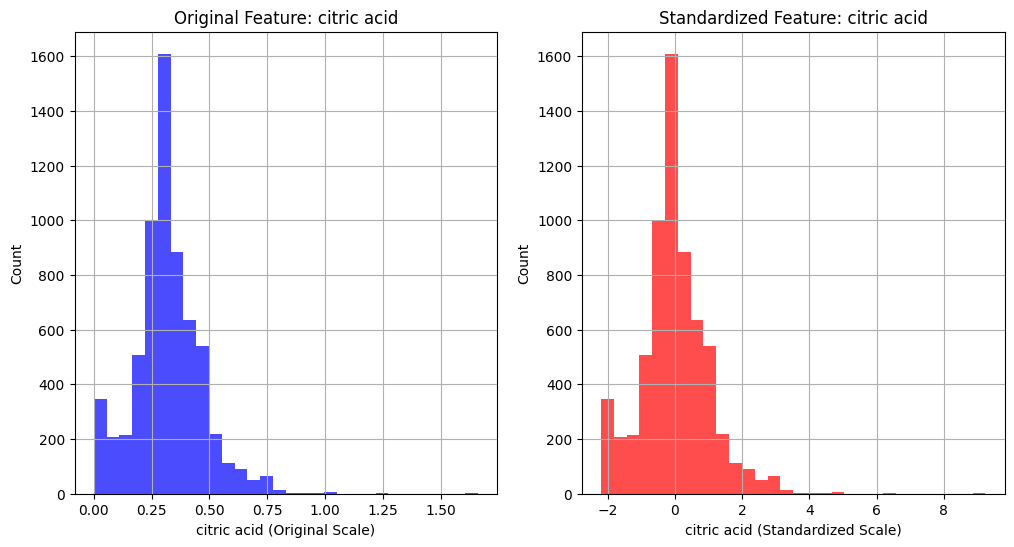

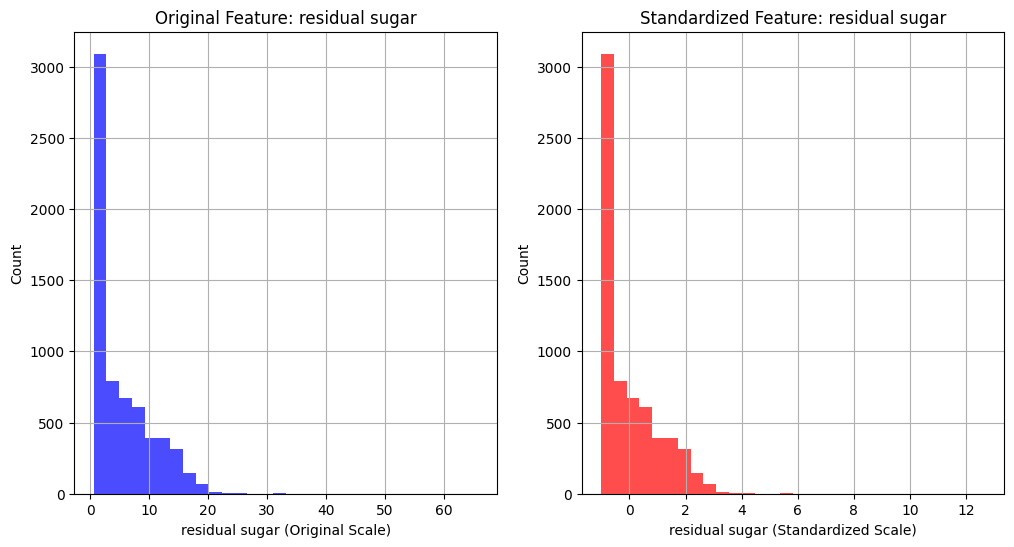

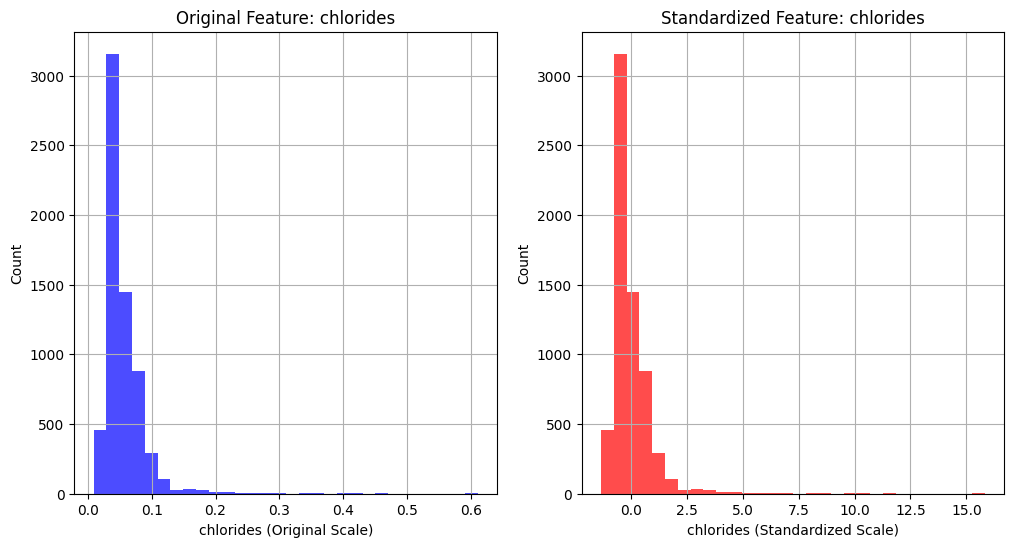

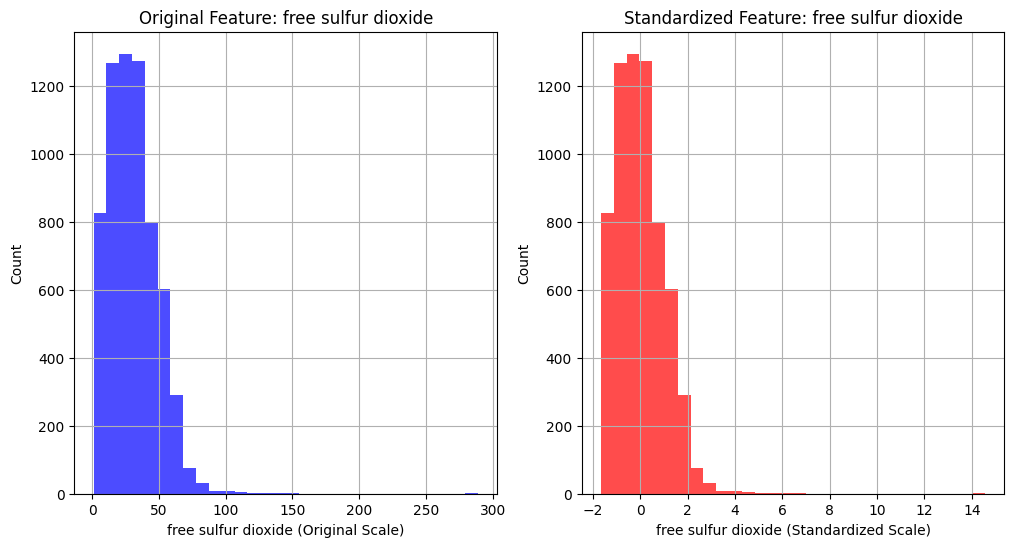

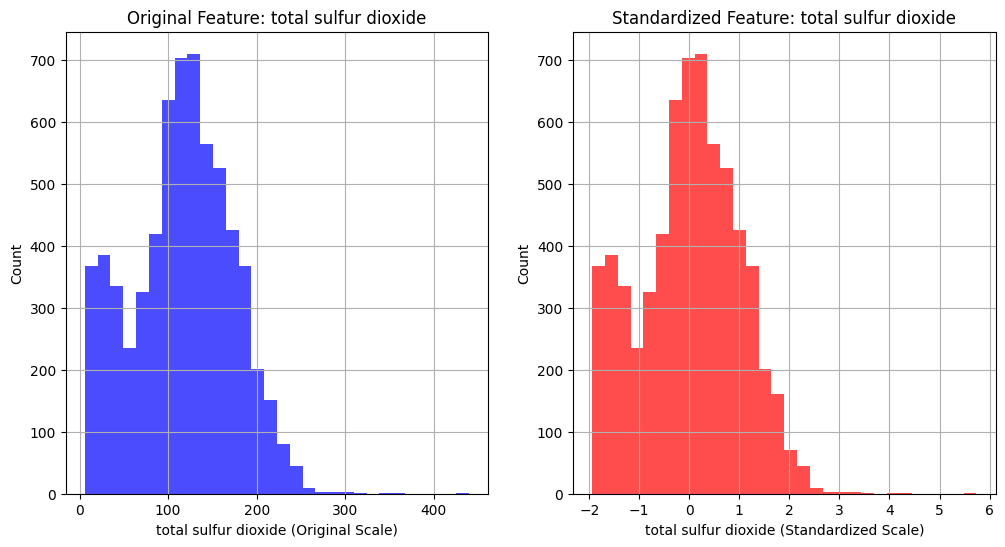

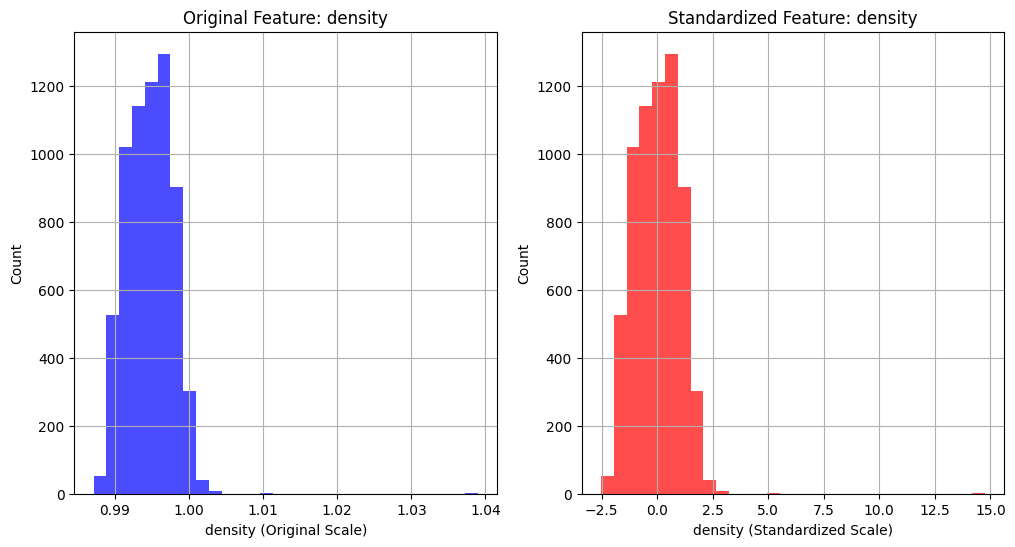

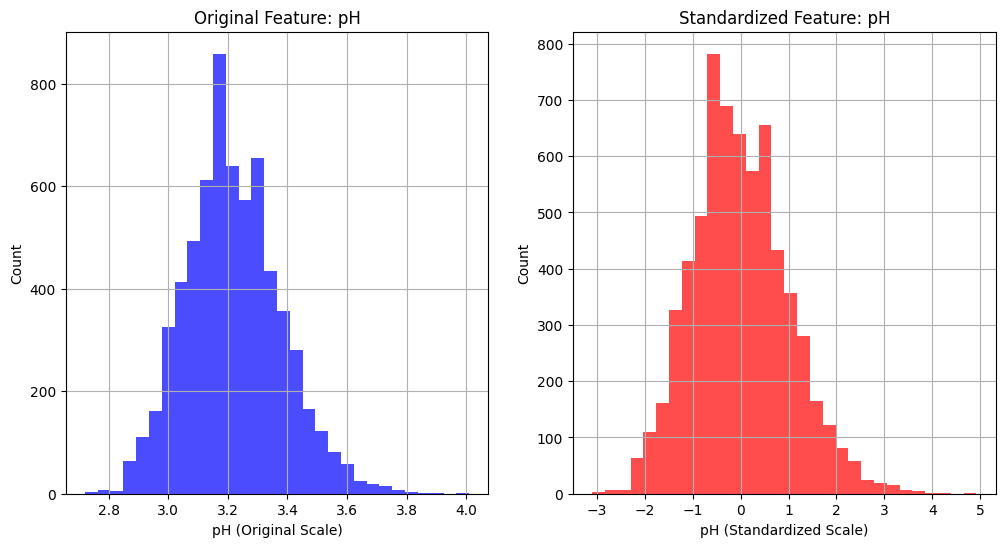

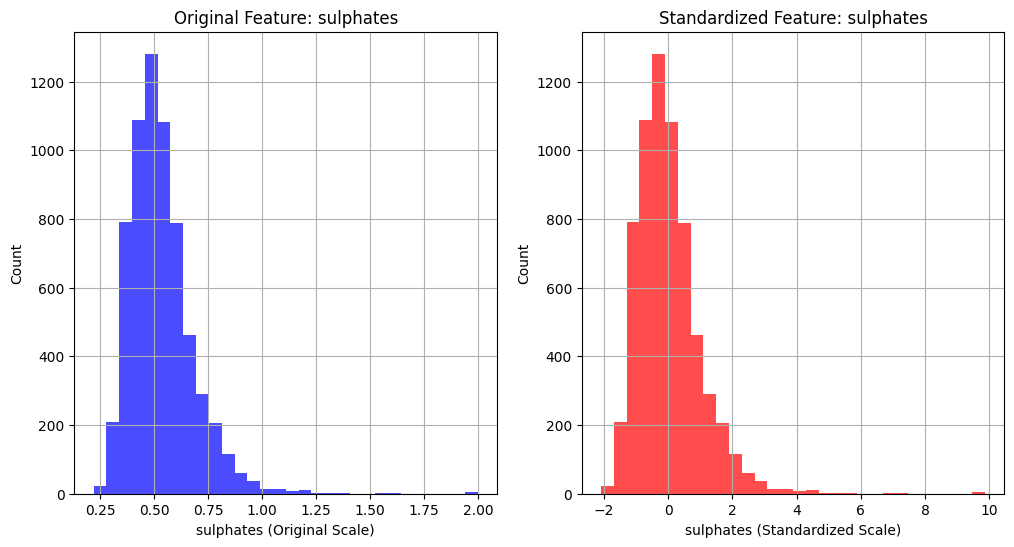

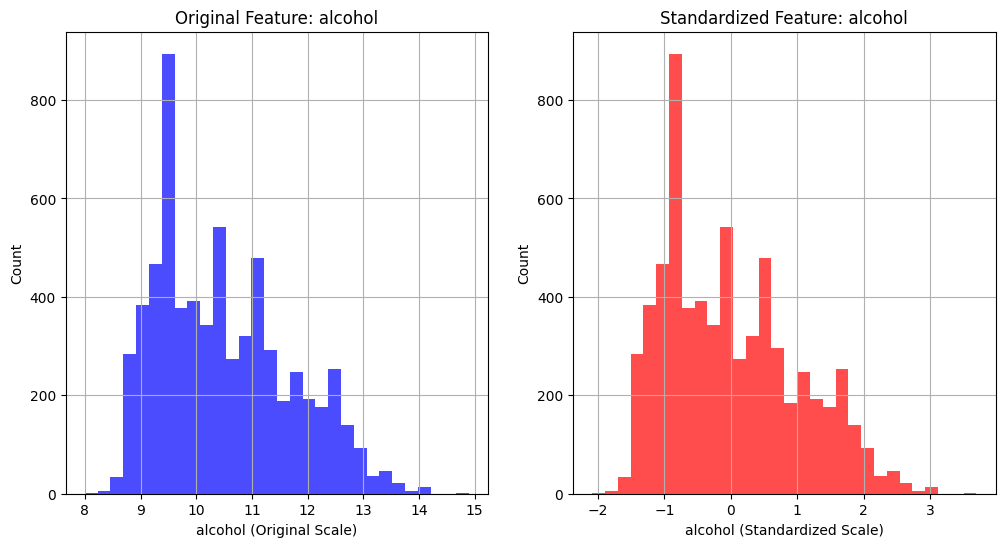

In [48]:


# Create a DataFrame for original features
original_features_df = pd.DataFrame(data=data_combined.loc[:, features].values, columns=features)
display(standardized_features.head())
# Loop through each feature to plot histograms
for feature in features:
    plt.figure(figsize=(12, 6))

    # Plot histogram for original feature values
    plt.subplot(1, 2, 1)
    plt.hist(original_features_df[feature], bins=30, color='blue', alpha=0.7)
    plt.title(f"Original Feature: {feature}")
    plt.xlabel(f"{feature} (Original Scale)")
    plt.ylabel("Count")
    plt.grid(True)

    # Plot histogram for standardized feature values
    plt.subplot(1, 2, 2)
    plt.hist(standardized_features[feature], bins=30, color='red', alpha=0.7)
    plt.title(f"Standardized Feature: {feature}")
    plt.xlabel(f"{feature} (Standardized Scale)")
    plt.ylabel("Count")
    plt.grid(True)

    #plt.tight_layout()
    #plt.show()


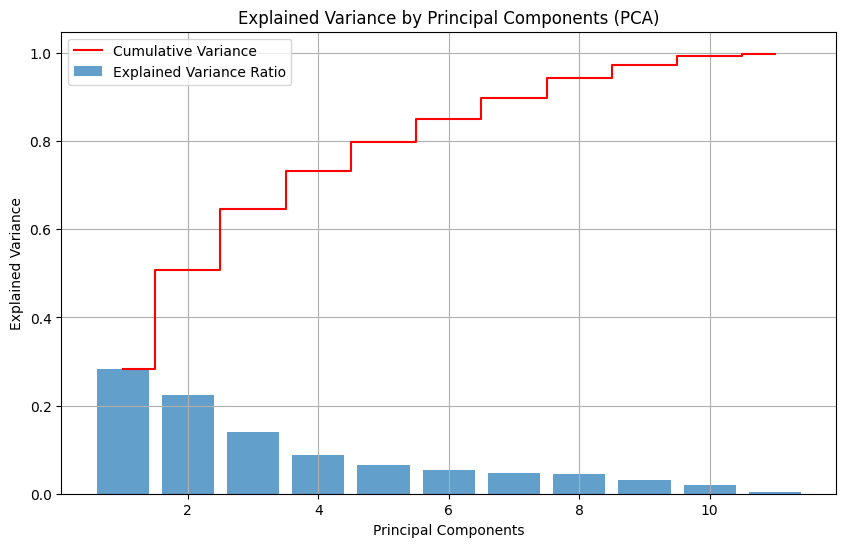

Explained Variance Ratio (10 Components): [0.28260814 0.22402037 0.13924972 0.08677359 0.06441853 0.05438294
 0.04697196 0.04486866 0.0303258  0.02076514 0.00410138]
Cumulative Variance (10 Components): [0.28260814 0.50662851 0.64587823 0.73265182 0.79707035 0.85145329
 0.89842525 0.94329391 0.97361972 0.99438485 0.99848623]


In [39]:
"""

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Apply PCA with 10 components
pca = PCA(n_components=11)
pca_features = pca.fit_transform(standardized_features)
# Explained variance ratio for PCA components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 12), explained_variance_ratio, alpha=0.7, label='Explained Variance Ratio')
plt.step(range(1, 12), cumulative_variance, where='mid', label='Cumulative Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components (PCA)')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance for interpretation
print("Explained Variance Ratio (10 Components):", explained_variance_ratio)
print("Cumulative Variance (10 Components):", cumulative_variance)"""


In [50]:
from sklearn.model_selection import train_test_split

# Assuming `pca_features` is the transformed data and `targets` contains the labels
# Replace `targets` with the actual target variable array or DataFrame
X = standardized_features  # Features after PCA transformation
y = data_combined['wine_type'].values       # Target variable
print(standardized_features.head())
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.166089         -1.030629     2.899845        1.546371  -0.314975   
1       0.373895          1.824366    -0.747613       -0.681719   0.598504   
2      -0.320370          0.305752     0.147046        0.411306  -1.028631   
3      -0.706073         -0.362438     1.041706        1.210056  -0.457706   
4       0.142473          0.062773    -0.816433        1.777588  -0.058059   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.367664              0.181456 -0.165631  0.258120  -1.016626   
1             0.083090              0.305311  0.301278  0.320319  -0.546178   
2             0.421155              0.305311 -0.859324 -0.239471  -0.613385   
3             1.717074              1.189993  0.408001 -0.612663  -0.142937   
4             1.829762              2.003900  1.395180 -0.674862  -0.210144   

    alcohol  
0  1.432308  
1 -0.496219  
2  1.264610  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hLayer1 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,353 (48.25 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 85s 5ms/step - accuracy: 0.8114 - loss: 0.4172 - val_accuracy: 0.9877 - val_loss: 0.0907 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0853 - val_accuracy: 0.9931 - val_loss: 0.0365 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0492 - val_accuracy: 0.9938 - val_loss: 0.0321 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9895 - loss: 0.0387 - val_accuracy: 0.9938 - val_loss: 0.0314 - learning_rate: 0.0010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9904 - loss: 0.0367 - val_accuracy: 0.9946 - val_loss: 0.0297 - learning_rate: 0.0010
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - loss: 0.0381 - val_accuracy: 0.9938 - val_loss: 0.0299 - learning_rate: 0.0010
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9939 - loss: 0

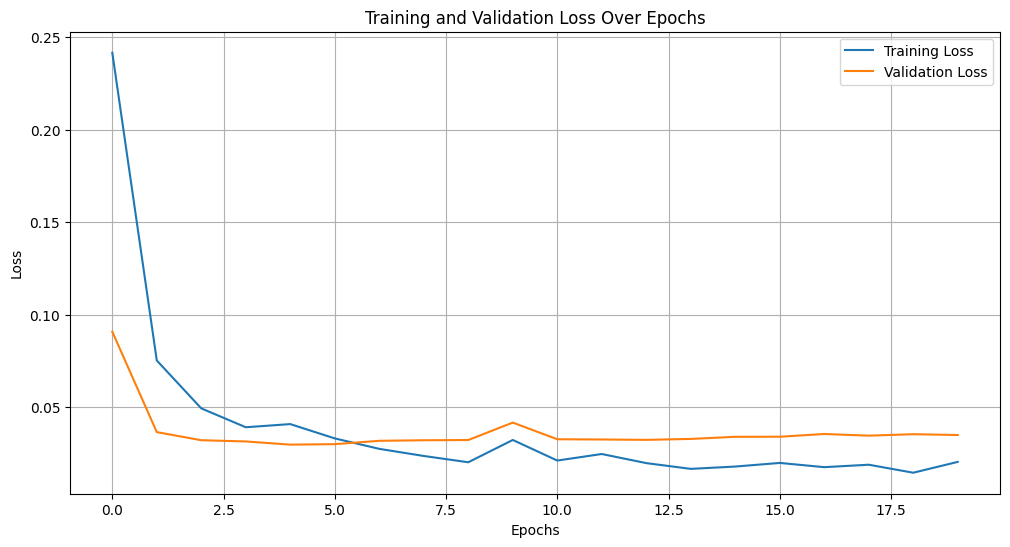

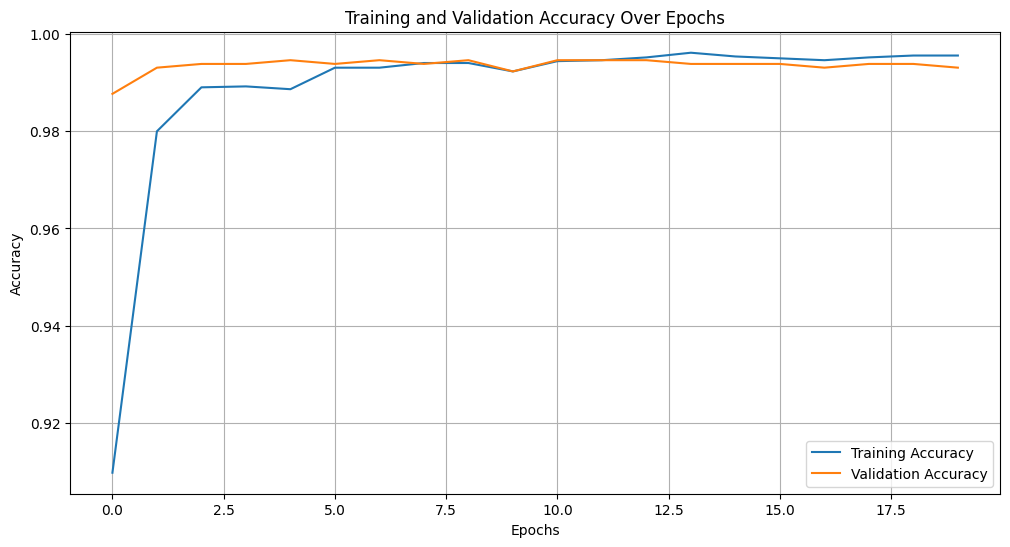

Model saved to /content/best_ANNmodel.h5
Training history saved to /content/best_ANNhistory.pkl


In [58]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import joblib
import time

# Start timing
start_time = time.time()

# Define the model
def define_best_model(input_shape):
    model = Sequential([
        Dense(128, input_shape=input_shape, activation='relu', name='hLayer1'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', name='hLayer2'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu', name='hLayer3'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid', name='outputLayer')  # Sigmoid for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
input_shape = (X_train.shape[1],)  # Ensure input shape matches the number of features
best_ANNmodel = define_best_model(input_shape)
best_ANNmodel.summary()

# Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history = best_ANNmodel.fit(
    X_train,                # Use original training data
    y_train,                # Training labels
    epochs=100,             # Number of epochs
    batch_size=32,          # Batch size
    verbose=1,              # Verbose output
    validation_data=(X_test, y_test),  # Validation data
    callbacks=[early_stopping, reduce_lr]  # Apply callbacks
)

# Display elapsed time
end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Evaluate the model on training and test data
train_eval = best_ANNmodel.evaluate(X_train, y_train, verbose=0)
test_eval = best_ANNmodel.evaluate(X_test, y_test, verbose=0)
print(f"\nTraining Evaluation: Loss = {train_eval[0]:.4f}, Accuracy = {train_eval[1]:.4f}")
print(f"Test Evaluation: Loss = {test_eval[0]:.4f}, Accuracy = {test_eval[1]:.4f}")

# Predictions for metrics calculation
ytrain_hat = best_ANNmodel.predict(X_train).flatten()
ytest_hat = best_ANNmodel.predict(X_test).flatten()

# Calculate residuals
diffyt = y_train - ytrain_hat
diffyp = y_test - ytest_hat

# Training metrics
train_mean = np.mean(diffyt)
train_std = np.std(diffyt)
train_mae = np.mean(np.abs(diffyt))
train_r2 = np.corrcoef(y_train, ytrain_hat)[0, 1] ** 2

# Test metrics
test_mean = np.mean(diffyp)
test_std = np.std(diffyp)
test_mae = np.mean(np.abs(diffyp))
test_r2 = np.corrcoef(y_test, ytest_hat)[0, 1] ** 2

# Display metrics
print("\nTraining Metrics:")
print(f"Mean: {train_mean:.4f}, SD: {train_std:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"Mean: {test_mean:.4f}, SD: {test_std:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Plot training history (loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training history (accuracy)
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
model_path = '/content/best_ANNmodel.h5'
best_ANNmodel.save(model_path)
print(f"Model saved to {model_path}")

# Save the training history
history_path = '/content/best_ANNhistory.pkl'
joblib.dump(history.history, history_path)
print(f"Training history saved to {history_path}")


Class Weights: {0: 2.014341085271318, 1: 0.6650883030458152}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hLayer1 (Dense)                      │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_39 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hLayer3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,353 (48.25 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8188 - loss: 0.3281 - val_accuracy: 0.9892 - val_loss: 0.0988 - learning_rate: 0.0010
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9769 - loss: 0.0825 - val_accuracy: 0.9938 - val_loss: 0.0431 - learning_rate: 0.0010
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9856 - loss: 0.0525 - val_accuracy: 0.9923 - val_loss: 0.0362 - learning_rate: 0.0010
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9864 - loss: 0.0514 - val_accuracy: 0.9931 - val_loss: 0.0353 - learning_rate: 0.0010
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9923 - val_loss: 0.0332 - learning_rate: 0.0010
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9919 - loss: 0.0371 - val_accuracy: 0.9923 - val_loss: 0.0343 - learning_rate: 0.0010
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9924 - loss: 0.

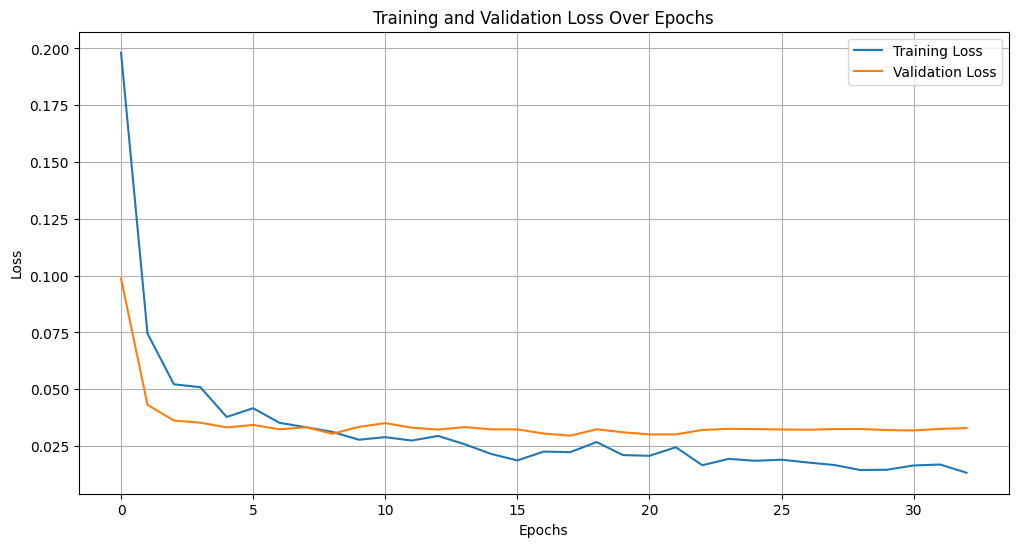

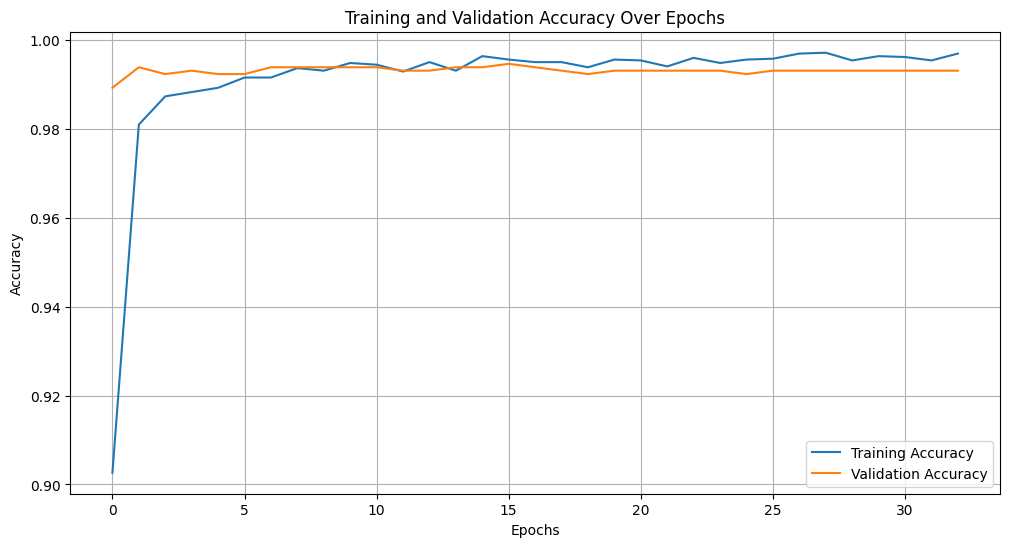

Model saved to /content/best_ANNmodel.h5
Training history saved to /content/best_ANNhistory.pkl


In [72]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import joblib
import time

# Start timing
start_time = time.time()

# Define the model
def define_best_model(input_shape):
    model = Sequential([
        Dense(128, input_shape=input_shape, activation='relu', name='hLayer1'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu', name='hLayer2'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu', name='hLayer3'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(1, activation='sigmoid', name='outputLayer')  # Sigmoid for binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Compute class weights to address potential imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Initialize the model
input_shape = (X_train.shape[1],)  # Ensure input shape matches the number of features
best_ANNmodel = define_best_model(input_shape)
best_ANNmodel.summary()

# Define early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history = best_ANNmodel.fit(
    X_train,
    y_train,
    epochs=100,             # Number of epochs
    batch_size=32,          # Batch size
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],  # Apply callbacks
    class_weight=class_weights             # Apply class weights
)

# Display elapsed time
end_time = time.time()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Evaluate the model on training and test data
train_eval = best_ANNmodel.evaluate(X_train, y_train, verbose=0)
test_eval = best_ANNmodel.evaluate(X_test, y_test, verbose=0)
print(f"\nTraining Evaluation: Loss = {train_eval[0]:.4f}, Accuracy = {train_eval[1]:.4f}")
print(f"Test Evaluation: Loss = {test_eval[0]:.4f}, Accuracy = {test_eval[1]:.4f}")

# Predictions for metrics calculation
ytrain_hat = best_ANNmodel.predict(X_train).flatten()
ytest_hat = best_ANNmodel.predict(X_test).flatten()

# Apply threshold for binary predictions
threshold = 0.5
ytrain_pred_binary = (ytrain_hat >= threshold).astype(int)
ytest_pred_binary = (ytest_hat >= threshold).astype(int)

# Calculate classification metrics
print("\nClassification Report (Training):")
print(classification_report(y_train, ytrain_pred_binary))

print("\nClassification Report (Test):")
print(classification_report(y_test, ytest_pred_binary))

# Calculate ROC-AUC score
roc_auc_train = roc_auc_score(y_train, ytrain_hat)
roc_auc_test = roc_auc_score(y_test, ytest_hat)
print(f"\nROC-AUC (Training): {roc_auc_train:.4f}")
print(f"ROC-AUC (Test): {roc_auc_test:.4f}")

# Plot training history (loss)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training history (accuracy)
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
model_path = '/content/best_ANNmodel.h5'
best_ANNmodel.save(model_path)
print(f"Model saved to {model_path}")

# Save the training history
history_path = '/content/best_ANNhistory.pkl'
joblib.dump(history.history, history_path)
print(f"Training history saved to {history_path}")


In [78]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Refit the scaler (if not previously saved)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data

# Step 2: Preprocess External Data (ensure it has the same 11 features)
external_data = np.array([
    [7.0, 0.17, 0.74, 12.8, 0.045, 24.0, 126.0, 0.99420, 3.26, 0.38, 12.2],
    [7.7, 0.64, 0.21, 2.2, 0.077, 32.0, 133.0, 0.99560, 3.27, 0.45, 9.9],
    [6.8, 0.39, 0.34, 7.4, 0.020, 38.0, 133.0, 0.99212, 3.18, 0.44, 12.0],
    [6.3, 0.28, 0.47, 11.2, 0.040, 61.0, 183.0, 0.99592, 3.12, 0.51, 9.5],
    [7.4, 0.35, 0.20, 13.9, 0.054, 63.0, 229.0, 0.99888, 3.11, 0.50, 8.9],
    [7.2, 0.62, 0.06, 2.70, 0.077, 15.0, 85.0, 0.99746, 3.51, 0.54, 9.5],
    [7.6, 0.32, 0.58, 16.75, 0.050, 43.0, 163.0, 0.99990, 3.15, 0.54, 9.2],
    [5.6, 0.28, 0.27, 3.90, 0.043, 52.0, 158.0, 0.99202, 3.35, 0.44, 10.7],
    [6.4, 0.37, 0.20, 5.60, 0.117, 61.0, 183.0, 0.99459, 3.24, 0.43, 9.5],
    [6.5, 0.26, 0.50, 8.00, 0.051, 46.0, 197.0, 0.99536, 3.18, 0.47, 9.5],
    [7.2, 0.62, 0.06, 2.70, 0.077, 15.0, 85.0, 0.99746, 3.51, 0.54, 9.5],
    [7.5, 0.24, 0.49, 9.4, 0.048, 50.0, 149.0, 0.99620, 3.17, 0.59, 10.5],
    [5.0, 0.74, 0.00, 1.2, 0.041, 16.0, 46.0, 0.99258, 4.01, 0.59, 12.5],
    [7.4, 0.28, 0.30, 5.3, 0.054, 44.0, 161.0, 0.99410, 3.12, 0.48, 10.3],
    [6.6, 0.56, 0.16, 3.1, 0.045, 28.0, 92.0, 0.99400, 3.12, 0.35, 9.1],
    [5.6, 0.50, 0.09, 2.3, 0.049, 17.0, 99.0, 0.99370, 3.63, 0.63, 13.0]
])

# Standardize the external data using the same scaler as training
external_data_scaled = scaler.transform(external_data)

# Step 3: Predict using the trained ANN model
external_predictions = best_ANNmodel.predict(external_data_scaled)

# Step 4: Flatten predictions (if needed)
external_predictions = external_predictions.flatten()

# Step 5: Map predictions to "Red Wine" or "White Wine"
def map_predictions(predictions, threshold=0.5):
    return ["Red Wine" if pred < threshold else "White Wine" for pred in predictions]

mapped_predictions = map_predictions(external_predictions)

# Step 6: Display predictions alongside the input data
print("Predictions on External Data:")
print(f"{'Input Data':<80} {'Predicted Probability':<25} {'Predicted Class'}")
for i, (row, prob, pred_class) in enumerate(zip(external_data, external_predictions, mapped_predictions)):
    input_data_str = ", ".join([f"{x:.2f}" for x in row])
    print(f"{input_data_str:<80} {prob:<25.4f} {pred_class}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predictions on External Data:
Input Data                                                                       Predicted Probability     Predicted Class
7.00, 0.17, 0.74, 12.80, 0.04, 24.00, 126.00, 0.99, 3.26, 0.38, 12.20            0.2276                    Red Wine
7.70, 0.64, 0.21, 2.20, 0.08, 32.00, 133.00, 1.00, 3.27, 0.45, 9.90              0.9944                    White Wine
6.80, 0.39, 0.34, 7.40, 0.02, 38.00, 133.00, 0.99, 3.18, 0.44, 12.00             0.9513                    White Wine
6.30, 0.28, 0.47, 11.20, 0.04, 61.00, 183.00, 1.00, 3.12, 0.51, 9.50             1.0000                    White Wine
7.40, 0.35, 0.20, 13.90, 0.05, 63.00, 229.00, 1.00, 3.11, 0.50, 8.90             1.0000                    White Wine
7.20, 0.62, 0.06, 2.70, 0.08, 15.00, 85.00, 1.00, 3.51, 0.54, 9.50               0.4373                    Red Wine
7.60, 0.32, 0.58, 16.75, 0.05, 43.00, 163.00, 1.00, 3.15, 0.54, 9.20             0.9972                  

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
"""
# Define acceptable ranges for the principal components
pc1_min, pc1_max = -7.5, 7.5  # Example range for Principal Component 1
pc2_min, pc2_max = -7.5, 7.5  # Example range for Principal Component 2

# Filter the DataFrame to retain only rows within the range
filtered_df = final_df[
    (final_df['Principal Component 1'] >= pc1_min) &
    (final_df['Principal Component 1'] <= pc1_max) &
    (final_df['Principal Component 2'] >= pc2_min) &
    (final_df['Principal Component 2'] <= pc2_max)
]

# Display the first few rows of the filtered data
print("Filtered PCA Data (First 5 Rows):")
display(filtered_df.head())

# Plotting the filtered PCA data
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['Principal Component 1'], filtered_df['Principal Component 2'],
            c=filtered_df['wine_type'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Wine Type (0 = Red, 1 = White)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Filtered PCA of Wine Data')
plt.grid(True)
plt.show()
"""

In [ ]:
"""
# Split the standardized data into training (80%) and test (20%) sets
train_data, test_data = train_test_split(standardized_features, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print(f"Training Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

# Display the first few rows of each set
print("\nTraining Data (First 5 Rows):")
display(train_data.head())

print("\nTest Data (First 5 Rows):")
display(test_data.head())
"""

In [ ]:

"""
from sklearn.model_selection import train_test_split

# Assuming `standardized_features` is your DataFrame with the last column as the target variable
# Split into features (X) and target (y)
X = standardized_features.iloc[:, :-1]  # All columns except the last (features)
y = standardized_features.iloc[:, -1]  # The last column (target variable)

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Optional: Display the first few rows of each dataset
print("\nX_train (First 5 Rows):")
display(X_train.head())

print("\nX_test (First 5 Rows):")
display(X_test.head())

print("\ny_train (First 5 Rows):")
display(y_train.head())

print("\ny_test (First 5 Rows):")
display(y_test.head()) """


In [ ]:
def define_model(NE): #NE = nombre de neurones d'entrée

    model = keras.models.Sequential()
    model.add(keras.layers.Input(NE, name='iLayer'))
    model.add(keras.layers.Dense(7, activation='relu', name='hLayer1'))
    model.add(keras.layers.Dense(5, activation='relu', name='hLayer2'))
    model.add(keras.layers.Dense(3, activation='softmax', name='oLayer'))

    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import visualID_Eng as vID
import numpy as np
import matplotlib.pyplot as plt
import joblib

# Start timing
vID.chrono_start()

# Define early stopping
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Define the model
def define_model(input_shape):
    model = Sequential([
        Dense(64, input_shape=input_shape, activation='relu', name='hLayer1'),  # Hidden layer 1
        Dense(32, activation='relu', name='hLayer2'),                          # Hidden layer 2
        Dense(1, activation='sigmoid', name='outputLayer')                     # Output layer (binary classification)
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize the model
ANNmodel = define_model((11,))  # Input shape is (11,) for 11 features
ANNmodel.summary()

# Start timing again
vID.chrono_start()

# Train the model
ANNhistory = ANNmodel.fit(
    X_train,
    y_train,
    epochs=700,
    batch_size=5,
    verbose=1,
    validation_data=(X_test, y_test),
    callbacks=[es]  # Apply early stopping
)

# Show elapsed time
vID.chrono_show()

# Evaluate the model on training and test data
train_eval = ANNmodel.evaluate(X_train, y_train, verbose=0)
test_eval = ANNmodel.evaluate(X_test, y_test, verbose=0)
print(f"\nTraining Evaluation: Loss = {train_eval[0]:.4f}, Accuracy = {train_eval[1]:.4f}")
print(f"Test Evaluation: Loss = {test_eval[0]:.4f}, Accuracy = {test_eval[1]:.4f}")

# Predictions for metrics calculation
ytrain_hat = ANNmodel.predict(X_train)
ytest_hat = ANNmodel.predict(X_test)

# Flatten predictions if needed
ytrain_hat = ytrain_hat.flatten()
ytest_hat = ytest_hat.flatten()

# Calculate residuals
diffyt = y_train - ytrain_hat
diffyp = y_test - ytest_hat

# Training metrics
train_mean = np.mean(diffyt)
train_std = np.std(diffyt)
train_mae = np.average(np.abs(diffyt))
train_r2 = np.corrcoef(y_train, ytrain_hat)[0, 1]

# Test metrics
test_mean = np.mean(diffyp)
test_std = np.std(diffyp)
test_mae = np.average(np.abs(diffyp))
test_r2 = np.corrcoef(y_test, ytest_hat)[0, 1]

# Display metrics
print("\nTraining Metrics:")
print(f"Mean: {train_mean:.4f}, SD: {train_std:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"Mean: {test_mean:.4f}, SD: {test_std:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(ANNhistory.history['loss'], label='Training Loss')
plt.plot(ANNhistory.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Save the model
model_path = '/content/ANNmodel.h5'
ANNmodel.save(model_path)
print(f"Model saved to {model_path}")

# Optionally save the history
history_path = '/content/ANNhistory.pkl'
joblib.dump(ANNhistory.history, history_path)
print(f"Training history saved to {history_path}")



In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(ANNhistory.history['loss'], label='Training Loss')
plt.plot(ANNhistory.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Compare metrics
print("\nTraining Metrics:")
print(f"Mean: {train_mean:.4f}, SD: {train_std:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")

print("\nTest Metrics:")
print(f"Mean: {test_mean:.4f}, SD: {test_std:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# Check for overfitting
if train_r2 > 0.95 and (train_r2 - test_r2) > 0.1:
    print("\nPotential Overfitting Detected: Training R² is significantly higher than Test R².")
elif test_r2 > 0.95:
    print("\nGood Generalization: The model performs well on the test set.")
else:
    print("\nModel may underfit or not generalize well. Consider tuning.")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate residuals (errors)
train_residuals = y_train - ytrain_hat
test_residuals = y_test - ytest_hat

# Standardize the residuals
train_std_error = train_residuals / np.std(train_residuals)
test_std_error = test_residuals / np.std(test_residuals)

# Plot histogram of standardized errors
plt.figure(figsize=(12, 6))

# Histogram for training data
plt.subplot(1, 2, 1)
plt.hist(train_std_error, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error (Training Data)')
plt.xlabel('Standardized Error')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for test data
plt.subplot(1, 2, 2)
plt.hist(test_std_error, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.axvline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error (Test Data)')
plt.xlabel('Standardized Error')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

# Scatter plot of standardized error vs. predictions (optional)
plt.figure(figsize=(12, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(ytrain_hat, train_std_error, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error vs. Predicted (Training Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Error')
plt.grid(True)

# Scatter plot for test data
plt.subplot(1, 2, 2)
plt.scatter(ytest_hat, test_std_error, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)  # Zero reference line
plt.title('Standardized Error vs. Predicted (Test Data)')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Error')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Save the model to an HDF5 file
model_path = '/content/ANNmodel.h5'
ANNmodel.save(model_path)
print(f"Model saved to {model_path}")


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('/content/ANNmodel.h5')
print("Model loaded successfully!")


In [ ]:
# Example: New data to predict
#new_data = np.array([[7.5, 0.33, 0.1, 1.2, 0.015, 17, 45, 0.9968, 3.15, 0.5, 10.5]])  # Shape: (1, 11)
new_data = np.array([[7.9, 0.37, 0.23, 1.8, 0.077, 23, 49, 0.9963, 3.28, 0.67, 9.3]])


# Ensure the data is scaled like your training data
new_data_scaled = StandardScaler().fit_transform(new_data)  # Use the same scaler applied to X_train

# Predict using the model
prediction = ANNmodel.predict(new_data_scaled)
print(f"Predicted value: {prediction[0][0]:.4f}")

predicted_class = 1 if prediction[0][0] >= 0.5 else 0
print(f"Predicted class: {predicted_class}")

